# 오디오 분류(Audio Classification)

* 가상 악기를 활용해 악기별 음색 데이터셋을 활용해 오디오 분류

1. 기존 데이터에서 분류에 사용되는 방법을 사용해 분류
2. 오디오 데이터에 특화된 분류

* 출처: https://bab2min.tistory.com/642

### 데이터 준비 및 전처리

In [ ]:
import numpy as np
import itertools
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

* 데이터를 저장할 리스트와 파일을 불러올 경로를 지정

* https://s3.ap-northeast-2.amazonaws.com/suanlab.com/dataset/GeneralMidi.wav



In [ ]:
!wget https://www.dropbox.com/s/3dsnj5ldtf3dcx4/GeneralMidi.wav

--2021-09-02 10:42:33--  https://www.dropbox.com/s/3dsnj5ldtf3dcx4/GeneralMidi.wav
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3dsnj5ldtf3dcx4/GeneralMidi.wav [following]
--2021-09-02 10:42:33--  https://www.dropbox.com/s/raw/3dsnj5ldtf3dcx4/GeneralMidi.wav
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce296ea56fb6fd6d0a2f2aa95e1.dl.dropboxusercontent.com/cd/0/inline/BVbkGapFwlnbWvkAtVi6fwepUzCaOmV0phP3pNW256mXBOvsS0gQO4jSHFEep_a40qznpPht5juWRP1Gm9DgvSHcZEFbXeGRlL2EHDPgD0PrnFXmV_oZjVSbW_yYeN-K_8lMTvKhO04E-HMcXMGlZ662/file# [following]
--2021-09-02 10:42:33--  https://uce296ea56fb6fd6d0a2f2aa95e1.dl.dropboxusercontent.com/cd/0/inline/BVbkGapFwlnbWvkAtVi6fwepUzCaOmV0phP3pNW256mXBOvsS0gQO4jSHFEep_a40qznpPht5juWRP1G

In [ ]:
midi_file = './GeneralMidi.wav'

* wmv 파일에는 128개 악기와 46개 타악기의 음을 50개씩 2초 간격으로 존재
* 해당 예제에서는 일부 악기만 선택해서 사용

In [ ]:
# 2초 간격으로 떨어뜨려줌
instruments = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90] # 악기를 선택
num_notes = 50
sec = 2

audio = []
inst = []
for inst_idx, note in itertools.product(range(len(instruments)), range(num_notes)): # 악기당 50개의 음 
    instrument = instruments[inst_idx]
    offset = (instrument * num_notes * sec) + (note * sec) # 현재 악기 note에 따라서 해당하는 offset이 나오고 거기서 2초를 가져옴
    print('instrument: {}, note: {}, offset: {}'.format(instrument, note, offset))
    y, sr = librosa.load(midi_file, sr=None, offset=offset, duration=2.0)
    audio.append(y)
    inst.append(inst_idx) # 악기 구분

instrument: 0, note: 0, offset: 0
instrument: 0, note: 1, offset: 2
instrument: 0, note: 2, offset: 4
instrument: 0, note: 3, offset: 6
instrument: 0, note: 4, offset: 8
instrument: 0, note: 5, offset: 10
instrument: 0, note: 6, offset: 12
instrument: 0, note: 7, offset: 14
instrument: 0, note: 8, offset: 16
instrument: 0, note: 9, offset: 18
instrument: 0, note: 10, offset: 20
instrument: 0, note: 11, offset: 22
instrument: 0, note: 12, offset: 24
instrument: 0, note: 13, offset: 26
instrument: 0, note: 14, offset: 28
instrument: 0, note: 15, offset: 30
instrument: 0, note: 16, offset: 32
instrument: 0, note: 17, offset: 34
instrument: 0, note: 18, offset: 36
instrument: 0, note: 19, offset: 38
instrument: 0, note: 20, offset: 40
instrument: 0, note: 21, offset: 42
instrument: 0, note: 22, offset: 44
instrument: 0, note: 23, offset: 46
instrument: 0, note: 24, offset: 48
instrument: 0, note: 25, offset: 50
instrument: 0, note: 26, offset: 52
instrument: 0, note: 27, offset: 54
instrum

In [ ]:
audio_np = np.array(audio, np.float32)
inst_np = np.array(inst, np.int16)

print(audio_np.shape, inst_np.shape)

(500, 88200) (500,)


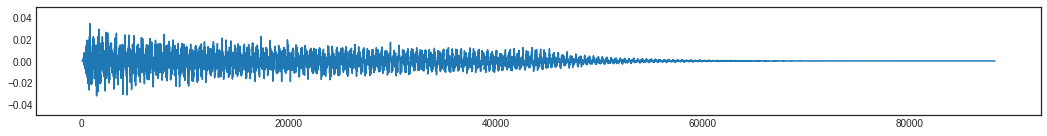

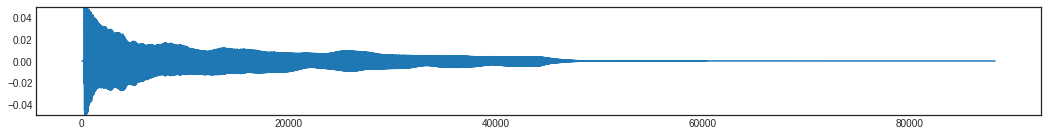

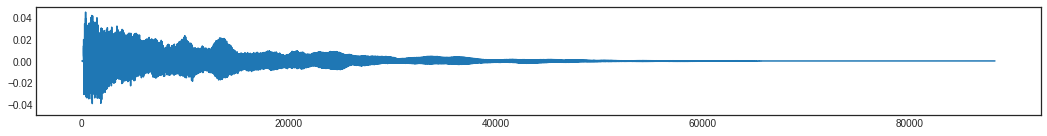

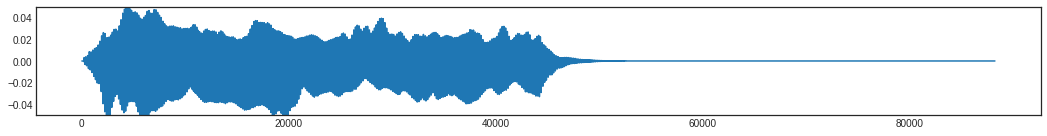

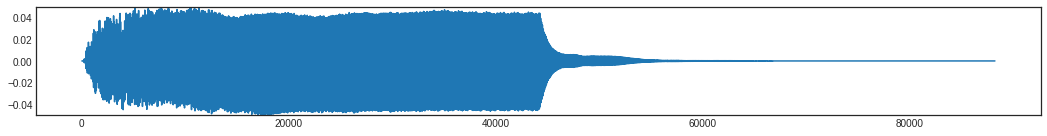

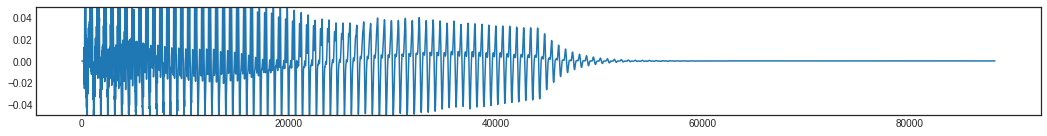

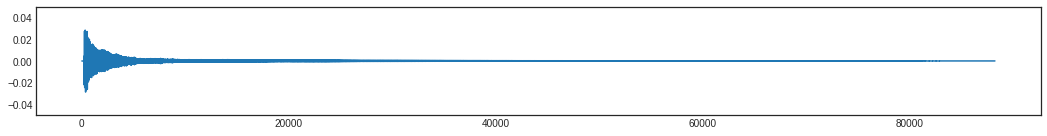

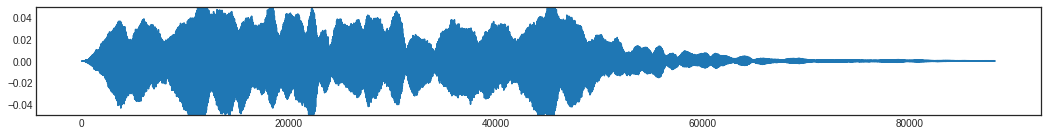

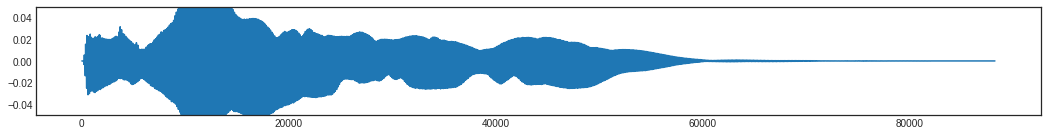

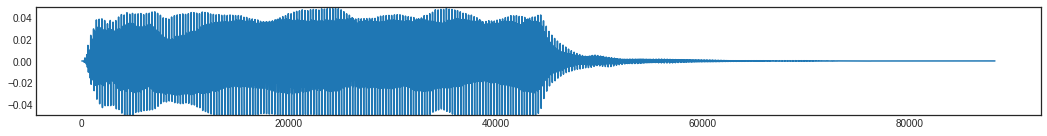

In [ ]:
for idx in range(0, len(audio_np), num_notes):
    plt.figure(figsize=(18, 2))
    plt.plot(audio_np[idx])
    plt.ylim((-0.05, 0.05))
    plt.show()

In [ ]:
print(inst_np[0])
ipd.Audio(audio_np[0], rate=sr)

0


In [ ]:
print(inst_np[50])
ipd.Audio(audio_np[50], rate=sr)

1


In [ ]:
print(inst_np[100])
ipd.Audio(audio_np[100], rate=sr)

2


In [ ]:
print(inst_np[150])
ipd.Audio(audio_np[150], rate=sr)

3


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(audio_np)

MinMaxScaler(copy=True, feature_range=(0, 1))

## 머신러닝을 이용한 오디오 분류

* 학습 데이터와 실험 데이터를 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(audio_np, inst_np, test_size=0.2)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(400, 88200)
(400,)
(100, 88200)
(100,)


### Logistic Regression

* Logistic Regression은 특성상 다중 분류에는 적합하지 않음

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x, train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.08


### Support Vector Machine

In [ ]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(train_x, train_y)
pred = SVM.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.08


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier()
dc.fit(train_x, train_y)
pred = dc.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.47


### 왜 이렇게 성능이 안나올까?

88200의 길이를 가지고 있기 때문에 잘 처리하지 못했다.

오디오의 특징에 맞게 Constant-Q라는 특징을 이용해본다.

## Constant-Q를 이용한 머신러닝 오디오 분류

### 데이터 준비

* wav는 매 순간의 음압을 측정하여 그 수치를 저장한 형태이기 때문에 그 자체로 음악을 분석하기에 적합하지 않음 (음의 높이와 세기를 듣는것이지 순간의 음압을 듣는게 아니기 때문)
* 푸리에 변환과 같은 변환 기법을 이용하여 시간 축의 데이터를 주파수 축의 데이터로 바꿔줘야할 필요가 있음
* 푸리에 변환 대신 푸리에 변환과 유사한 Constant-Q 변환을 사용
* Constant-Q 변환은 주파수 축이 로그 단위로 변환되고, 각 주파수에 따라 해상도가 다양하게 처리되기 때문에(저주파는 저해상도, 고주파는 고해상도) 음악을 처리하는 데에 푸리에 변환보다 유리

*   주파수 대역을 저장할 리스트 `audio_cqt` 선언
*   constant-Q 변환할 때는 변환할 오디오 데이터와 sampling rate가 필요
*   해당 데이터에서는 sampling rate가 모두 동일하므로 따로 처리가 필요하지 않음
*   여기서는 Constant-Q 변환을 사용해 오디오 데이터를 주파수 대역으로 변환




*   변환에는 앞서 준비한 데이터를 가져와 사용하며, Constant-Q 변환에는 `librosa.cqt` 함수를 사용
*   여기서 `n_bins`는 옥타브 단계 및 개수를, `bins_per_octave`는 한 옥타브가 가지는 단계를 의미
*   라벨에 대해선 원 핫 인코딩을 적용



In [ ]:
audio_cqt = []
for y in audio:
    ret = librosa.cqt(y, sr, hop_length=1024, n_bins=24*7, bins_per_octave=24)
    ret = np.abs(ret)
    audio_cqt.append(ret)

* 앞서 생성한 주파수 대역을 spectrogram으로 시각화
* 악기 간 spectrogram을 비교해보면 차이가 존재함을 알 수 있음

/usr/local/lib/python3.7/dist-packages/librosa/display.py:1336: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  "Frequency axis exceeds Nyquist. "


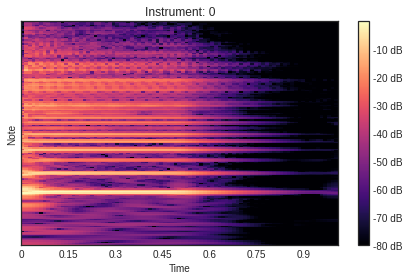

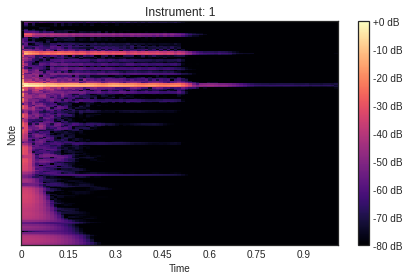

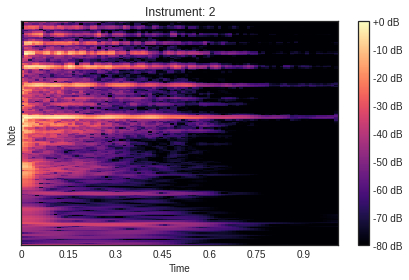

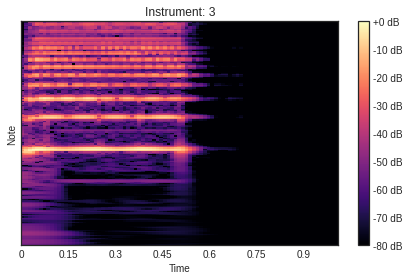

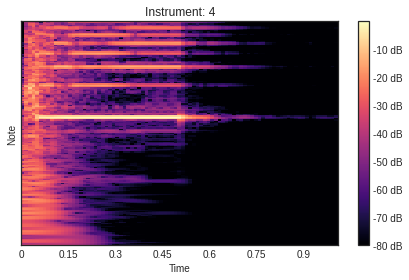

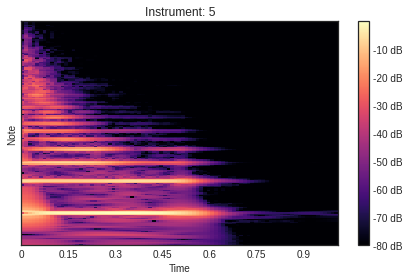

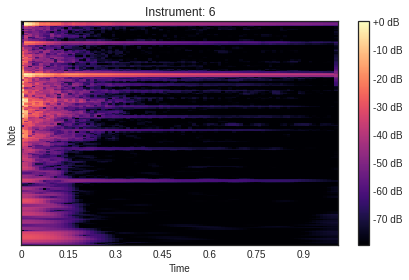

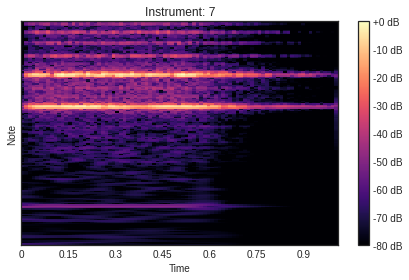

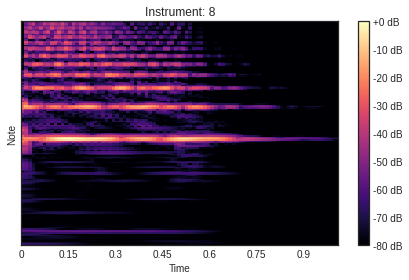

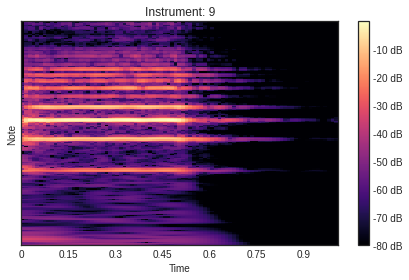

In [ ]:
for i in range(0, len(instruments)*num_notes, num_notes):
    amp_db = librosa.amplitude_to_db(np.abs(audio_cqt[i]), ref=np.max)
    librosa.display.specshow(amp_db, sr=sr, x_axis='time', y_axis='cqt_note')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Instrument: {}'.format(inst[i]))
    plt.tight_layout()
    plt.show()

* 훈련 데이터와 실험 데이터를 분리

In [ ]:
cqt_np = np.array(audio_cqt, np.float32)
inst_np = np.array(inst, np.int16)

print(cqt_np.shape, inst_np.shape)

(500, 168, 87) (500,)




*   분류기에서 사용하기 위해 3차원 벡터를 2차원 벡터로 변환



In [ ]:
cqt_np = cqt_np.reshape(500, -1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(cqt_np)

MinMaxScaler(copy=True, feature_range=(0, 1))



*   읽어온 데이터는 음량이나 범위가 다를 수 있음
*   min-max scaling을 통해 데이터의 범위를 조정함



* 학습 데이터와 실험 데이터를 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(cqt_np, inst_np, test_size=0.2)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(400, 14616)
(400,)
(100, 14616)
(100,)


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x, train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.31


### Support Vector Machine

In [ ]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(train_x, train_y)
pred = SVM.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.38


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier()
dc.fit(train_x, train_y)
pred = dc.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.59


## Constant-Q 특징을 이용한 딥러닝 오디오 분류

* 오디오 데이터를 spectrogram으로 가공하면 파장과 세기를 가진 이미지(2차원 배열)가 생성
* 이 spectrogram을 CNN 이미지 분류를 통해 각 악기 소리를 분류

### DNN 모델 구성

In [ ]:
print(cqt_np.shape)

(500, 14616)


In [ ]:
from tensorflow.keras.utils import to_categorical

cqt_array = np.expand_dims(cqt_np, -1)
inst_cat = to_categorical(inst_np)

train_x, test_x, train_y, test_y = train_test_split(cqt_array, inst_cat, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 14616, 1)
(100, 14616, 1)
(400, 10)
(100, 10)


In [ ]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense

def model_build():
    model = Sequential()

    input = Input(shape=(14616, ), name='input')
    output = Dense(128, activation='relu', name='hidden1')(input)
    output = Dense(64, activation='relu', name='hidden2')(output)
    output = Dense(10, activation='softmax', name='output')(output)
    
    model = Model(inputs=[input], outputs=output)

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['acc'])
    return model

In [ ]:
model = model_build()
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 14616)]           0         
_________________________________________________________________
hidden1 (Dense)              (None, 128)               1870976   
_________________________________________________________________
hidden2 (Dense)              (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 1,879,882
Trainable params: 1,879,882
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_x, train_y, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
3/3 [==============================] - 0s 76ms/step - loss: 2.2873 - acc: 0.0750 - val_loss: 2.1038 - val_acc: 0.2375
Epoch 2/30
3/3 [==============================] - 0s 15ms/step - loss: 2.0481 - acc: 0.3938 - val_loss: 1.9922 - val_acc: 0.2875
Epoch 3/30
3/3 [==============================] - 0s 22ms/step - loss: 1.8745 - acc: 0.4906 - val_loss: 1.9374 - val_acc: 0.3000
Epoch 4/30
3/3 [==============================] - 0s 15ms/step - loss: 1.7135 - acc: 0.5312 - val_loss: 1.8772 - val_acc: 0.2875
Epoch 5/30
3/3 [==============================] - 0s 15ms/step - loss: 1.5624 - acc: 0.5656 - val_loss: 1.8638 - val_acc: 0.2875
Epoch 6/30
3/3 [==============================] - 0s 15ms/step - loss: 1.4218 - acc: 0.6000 - val_loss: 1.8506 - val_acc: 0.3125
Epoch 7/30
3/3 [==============================] - 0s 16ms/step - loss: 1.2935 - acc: 0.6406 - val_loss: 1.8460 - val_acc: 0.3125
Epoch 8/30
3/3 [==============================] - 0s 15ms/step - loss: 1.1737 - acc: 0.6969 - val

In [ ]:
def plot_history(history_dict):
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(14, 5))
    
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b--', label='train_loss')
    ax1.plot(epochs, val_loss, 'r:', label='val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    acc = history_dict['acc']
    val_acc = history_dict['val_acc']
    
    epochs = range(1, len(loss) + 1)
    
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, acc, 'b--', label='train_acc')
    ax2.plot(epochs, val_acc, 'r:', label='val_acc')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

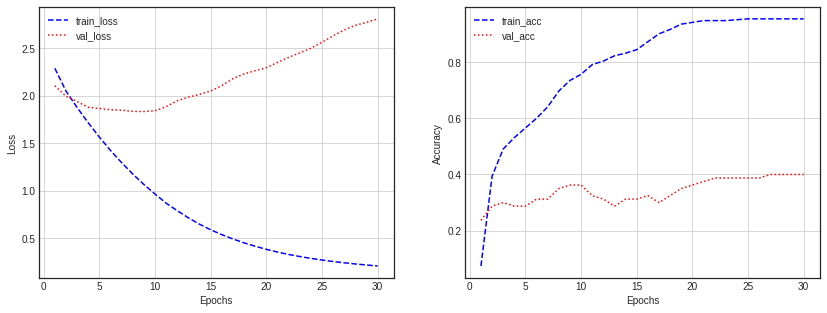

In [ ]:
plot_history(history.history)

### CNN 모델 구성



*   spectrogram(이미지)을 분류할 CNN 모델 구성
*   모델의 구성은 여타 이미지 분류 모델과 다르지 않음
*   spectrogram은 1차원 이미지로 간주


In [ ]:
cqt_np = np.array(audio_cqt, np.float32)
cqt_array = np.expand_dims(cqt_np, -1)
inst_cat = to_categorical(inst_np)

train_x, test_x, train_y, test_y = train_test_split(cqt_array, inst_cat, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 168, 87, 1)
(100, 168, 87, 1)
(400, 10)
(100, 10)


In [ ]:
from keras.layers import Conv2D, MaxPool2D, Flatten

def build_model():
    model = Sequential()

    input = Input(shape=(168, 87, 1))

    output = Conv2D(128, 3, strides=1, padding='same', activation='relu')(input)
    output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)
    
    output = Conv2D(256, 3, strides=1, padding='same', activation='relu')(output)
    output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

    output = Conv2D(512, 3, strides=1, padding='same', activation='relu')(output)
    output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)
        
    output = Flatten()(output)
    output = Dense(512, activation='relu')(output)
    output = Dense(256, activation='relu')(output)
    output = Dense(128, activation='relu')(output)

    output = Dense(10, activation='softmax')(output)

    model = Model(inputs=[input], outputs=output)

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                 metrics=['acc'])
    return model

In [ ]:
model = build_model()
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 168, 87, 1)]      0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 168, 87, 128)      1280      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 84, 44, 128)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 84, 44, 256)       295168    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 42, 22, 256)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 42, 22, 512)       1180160   
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 21, 11, 512)       0   

In [ ]:
history = model.fit(train_x, train_y, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 1s 300ms/step - loss: 0.0242 - acc: 0.9875 - val_loss: 0.4700 - val_acc: 0.8000
Epoch 2/20
3/3 [==============================] - 1s 276ms/step - loss: 0.0260 - acc: 0.9812 - val_loss: 0.5079 - val_acc: 0.7875
Epoch 3/20
3/3 [==============================] - 1s 276ms/step - loss: 0.0232 - acc: 0.9875 - val_loss: 0.5286 - val_acc: 0.8125
Epoch 4/20
3/3 [==============================] - 1s 277ms/step - loss: 0.0244 - acc: 0.9875 - val_loss: 0.5500 - val_acc: 0.8375
Epoch 5/20
3/3 [==============================] - 1s 277ms/step - loss: 0.0246 - acc: 0.9875 - val_loss: 0.5724 - val_acc: 0.8250
Epoch 6/20
3/3 [==============================] - 1s 279ms/step - loss: 0.0228 - acc: 0.9875 - val_loss: 0.5996 - val_acc: 0.8250
Epoch 7/20
3/3 [==============================] - 1s 279ms/step - loss: 0.0242 - acc: 0.9875 - val_loss: 0.6262 - val_acc: 0.8250
Epoch 8/20
3/3 [==============================] - 1s 279ms/step - loss: 0.0239 - acc: 0.98



*   훈련한 모델에 대한 정확도 평가
*   앞선 일반 분류 방법보다 정확도가 많이 오른 것을 확인할 수 있음



In [ ]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 2s 99ms/step - loss: 0.6852 - acc: 0.8900


[0.6851931214332581, 0.8899999856948853]

## MFCC를 이용한 머신러닝 오디오 분류

### 데이터 준비

* 데이터를 불러오고 MFCC(Mel-frequency cepstral coefficients)를 사용해 melspectrogram으로 변환

In [ ]:
audio_mfcc = []
for y in audio:
    ret = librosa.feature.mfcc(y=y, sr=sr)
    audio_mfcc.append(ret)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9839 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9839 missing from current font.
  font.set_text(s, 0, flags=flags)


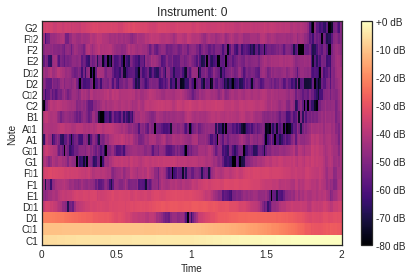

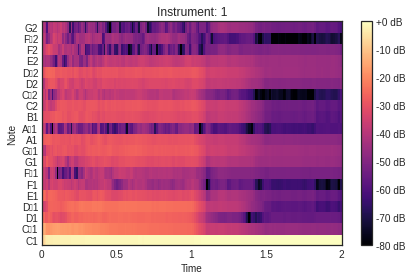

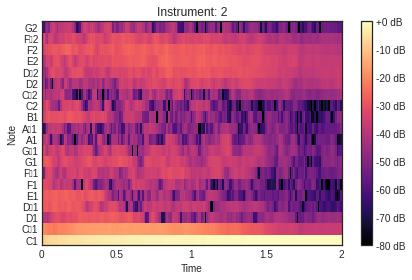

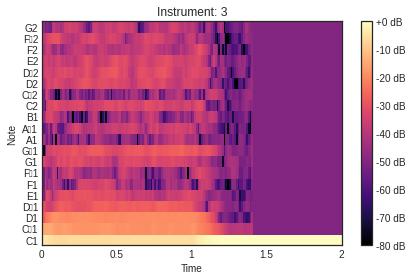

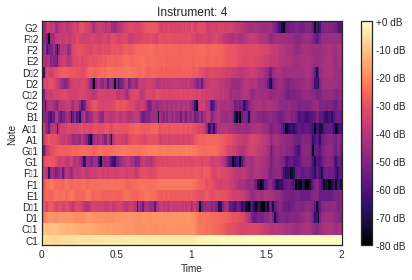

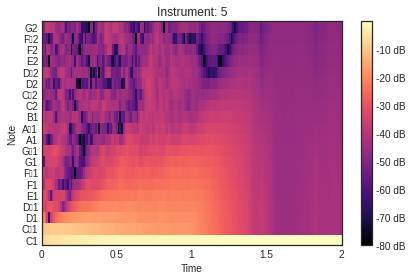

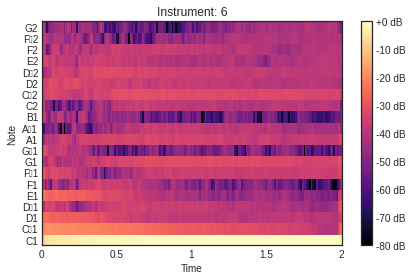

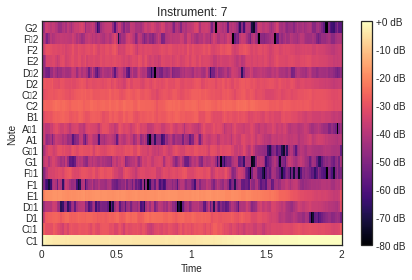

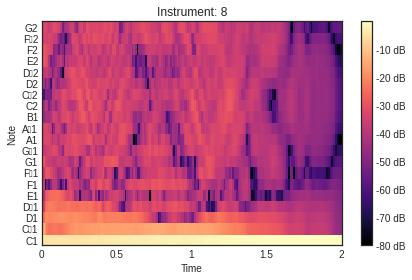

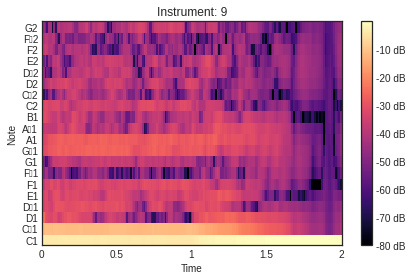

In [ ]:
for i in range(0, len(instruments) * num_notes, num_notes):
    amp_db = librosa.amplitude_to_db(np.abs(audio_mfcc[i]), ref=np.max)
    librosa.display.specshow(amp_db, sr=sr, x_axis='time', y_axis='cqt_note')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Instrument: {}'.format(inst[i]))
    plt.tight_layout()
    plt.show()

In [ ]:
mfcc_np = np.array(audio_mfcc, np.float32)
inst_np = np.array(inst, np.int16)

print(mfcc_np.shape, inst_np.shape)

(500, 20, 173) (500,)




*   분류기에서 사용하기 위해 3차원 벡터를 2차원 벡터로 변환



In [ ]:
mfcc_np = mfcc_np.reshape((500, 20 * 173))



*   읽어온 데이터는 음량이나 범위가 다를 수 있음
*   min-max scaling을 통해 데이터의 범위를 조정함



In [ ]:
sc = MinMaxScaler()
sc.fit(mfcc_np)

MinMaxScaler(copy=True, feature_range=(0, 1))

* 학습 데이터와 실험 데이터를 분리

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(mfcc_np, inst_np, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 3460)
(100, 3460)
(400,)
(100,)


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x, train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.92


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Support Vector Machine

In [ ]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(train_x, train_y)
pred = SVM.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.97


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier()
dc.fit(train_x, train_y)
pred = dc.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.87


## MFCC를 이용한 딥러닝 오디오 분류

* 앞선 문제점을 극복하기 위해 오디오 데이터에 특화된 분류 방법 필요
* 오디오 데이터를 spectrogram으로 가공하면 파장과 세기를 가진 이미지(2차원 배열)가 생성
* 이 spectrogram을 CNN 이미지 분류를 통해 각 악기 소리를 분류

### DNN 모델 구성

In [ ]:
from tensorflow.keras.utils import to_categorical

mfcc_np = np.array(audio_mfcc, np.float32)
mfcc_np = mfcc_np.reshape((500, 20 * 173))
mfcc_array = np.expand_dims(mfcc_np, -1)
inst_mfcc = to_categorical(inst_np)

train_x, test_x, train_y, test_y = train_test_split(mfcc_array, inst_mfcc, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 3460, 1)
(100, 3460, 1)
(400, 10)
(100, 10)


In [ ]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense

def model_build():
    model = Sequential()

    input = Input(shape=(3460, ), name='input')
    output = Dense(128, activation='relu', name='hidden1')(input)
    output = Dense(64, activation='relu', name='hidden2')(output)
    output = Dense(10, activation='softmax', name='output')(output)
    
    model = Model(inputs=[input], outputs=output)

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['acc'])
    return model

In [ ]:
model = model_build()
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 3460)]            0         
_________________________________________________________________
hidden1 (Dense)              (None, 128)               443008    
_________________________________________________________________
hidden2 (Dense)              (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 451,914
Trainable params: 451,914
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_x, train_y, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
3/3 [==============================] - 0s 67ms/step - loss: 259.0063 - acc: 0.1125 - val_loss: 140.6386 - val_acc: 0.1875
Epoch 2/30
3/3 [==============================] - 0s 12ms/step - loss: 128.0780 - acc: 0.1594 - val_loss: 105.6087 - val_acc: 0.1000
Epoch 3/30
3/3 [==============================] - 0s 12ms/step - loss: 81.4742 - acc: 0.1969 - val_loss: 72.0741 - val_acc: 0.2250
Epoch 4/30
3/3 [==============================] - 0s 12ms/step - loss: 67.7180 - acc: 0.2031 - val_loss: 42.0653 - val_acc: 0.3625
Epoch 5/30
3/3 [==============================] - 0s 13ms/step - loss: 40.2830 - acc: 0.3469 - val_loss: 38.9458 - val_acc: 0.2875
Epoch 6/30
3/3 [==============================] - 0s 13ms/step - loss: 28.3819 - acc: 0.3938 - val_loss: 36.4132 - val_acc: 0.3625
Epoch 7/30
3/3 [==============================] - 0s 13ms/step - loss: 24.9294 - acc: 0.4219 - val_loss: 29.3553 - val_acc: 0.2875
Epoch 8/30
3/3 [==============================] - 0s 13ms/step - loss: 15.4235 

In [ ]:
def plot_history(history_dict):
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(14, 5))
    
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b--', label='train_loss')
    ax1.plot(epochs, val_loss, 'r:', label='val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    acc = history_dict['acc']
    val_acc = history_dict['val_acc']
    
    epochs = range(1, len(loss) + 1)
    
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, acc, 'b--', label='train_acc')
    ax2.plot(epochs, val_acc, 'r:', label='val_acc')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

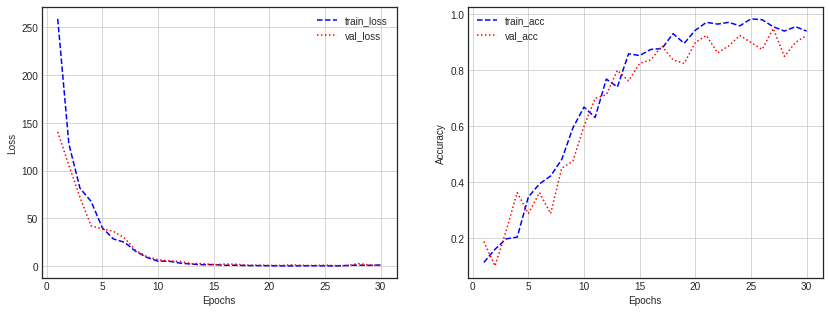

In [ ]:
plot_history(history.history)

In [ ]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 0s 4ms/step - loss: 0.6865 - acc: 0.9000


[0.686451256275177, 0.8999999761581421]

### CNN 모델 구성



*   spectrogram(이미지)을 분류할 CNN 모델 구성
*   모델의 구성은 여타 이미지 분류 모델과 다르지 않음
*   spectrogram은 1차원 이미지로 간주


In [ ]:
mfcc_np = np.array(audio_mfcc, np.float32)
mfcc_array = np.expand_dims(mfcc_np, -1)
inst_mfcc = to_categorical(inst_np)

train_x, test_x, train_y, test_y = train_test_split(mfcc_array, inst_mfcc, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 20, 173, 1)
(100, 20, 173, 1)
(400, 10)
(100, 10)


In [ ]:
from keras.layers import Conv2D, MaxPool2D, Flatten

def build_model():
    model = Sequential()

    input = Input(shape=(20, 173, 1))

    output = Conv2D(128, 3, strides=1, padding='same', activation='relu')(input)
    output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)
    
    output = Conv2D(256, 3, strides=1, padding='same', activation='relu')(output)
    output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

    output = Conv2D(512, 3, strides=1, padding='same', activation='relu')(output)
    output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)
        
    output = Flatten()(output)
    output = Dense(512, activation='relu')(output)
    output = Dense(256, activation='relu')(output)
    output = Dense(128, activation='relu')(output)

    output = Dense(10, activation='softmax')(output)

    model = Model(inputs=[input], outputs=output)

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                 metrics=['acc'])
    return model

In [ ]:
model = build_model()
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 20, 173, 1)]      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 20, 173, 128)      1280      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 10, 87, 128)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 10, 87, 256)       295168    
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 5, 44, 256)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 5, 44, 512)        1180160   
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 3, 22, 512)        0   

In [ ]:
history = model.fit(train_x, train_y, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 5s 1s/step - loss: 77.6641 - acc: 0.0781 - val_loss: 16.1447 - val_acc: 0.1125
Epoch 2/20
3/3 [==============================] - 0s 88ms/step - loss: 10.4321 - acc: 0.1187 - val_loss: 2.6313 - val_acc: 0.1500
Epoch 3/20
3/3 [==============================] - 0s 80ms/step - loss: 2.5391 - acc: 0.1594 - val_loss: 2.1909 - val_acc: 0.2500
Epoch 4/20
3/3 [==============================] - 0s 77ms/step - loss: 2.1674 - acc: 0.2812 - val_loss: 2.0255 - val_acc: 0.3250
Epoch 5/20
3/3 [==============================] - 0s 79ms/step - loss: 1.8302 - acc: 0.4406 - val_loss: 1.7970 - val_acc: 0.4000
Epoch 6/20
3/3 [==============================] - 0s 80ms/step - loss: 1.4464 - acc: 0.4938 - val_loss: 1.3561 - val_acc: 0.4500
Epoch 7/20
3/3 [==============================] - 0s 81ms/step - loss: 1.0486 - acc: 0.6656 - val_loss: 1.0386 - val_acc: 0.6625
Epoch 8/20
3/3 [==============================] - 0s 80ms/step - loss: 0.7463 - acc: 0.7719 - va



*   훈련한 모델에 대한 정확도 평가
*   앞선 일반 분류 방법보다 정확도가 많이 오른 것을 확인할 수 있음



In [ ]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 1s 45ms/step - loss: 0.1311 - acc: 0.9700


[0.13107676804065704, 0.9700000286102295]